In [66]:
import h5py
import pandas as pd
import numpy as np

In [67]:
# let's open the file
data_dir = 'Data-MLtutorial/JetDataset/'
fileIN = data_dir+'jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
# and see what it contains
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [68]:
target = np.array([])
jetList = np.array([])
jetImages = np.array([])
particle_features_names = dict()
jet_features_names = dict()
jetFeatures = np.array([])
datafiles = ['jetImage_7_100p_0_10000.h5',
             'jetImage_7_100p_10000_20000.h5',
             'jetImage_7_100p_30000_40000.h5',
             'jetImage_7_100p_40000_50000.h5',
             'jetImage_7_100p_50000_60000.h5'
            ]
for i_f,fileIN in enumerate(datafiles):
    print("Appending %s" %fileIN)
    f = h5py.File(data_dir + fileIN)
    jetList_file = np.array(f.get("jetConstituentList"))
    jetFeatures_file = np.array(f.get('jets'))
    target_file = np.array(f.get('jets')[0:,-6:-1])
    jetImages_file = np.array(f.get('jetImage'))
    jetList = np.concatenate([jetList, jetList_file], axis=0) if jetList.size else jetList_file
    jetFeatures = np.concatenate([jetFeatures, jetFeatures_file], axis=0) if jetFeatures.size else jetFeatures_file
    target = np.concatenate([target, target_file], axis=0) if target.size else target_file
    jetImages = np.concatenate([jetImages, jetImages_file], axis=0) if jetImages.size else jetImages_file
    del jetList_file, target_file, jetImages_file
    #save particles/nodes features names and their indecies in a dictionary
    if i_f==0:
      for feat_idx,feat_name in enumerate(list(f['particleFeatureNames'])[:-1]):
        particle_features_names[feat_name.decode("utf-8").replace('j1_','')] = feat_idx
      for feat_idx,feat_name in enumerate(list(f['jetFeatureNames'])[:-1]):
        jet_features_names[feat_name.decode("utf-8").replace('j_','')] = feat_idx
    f.close()

Appending jetImage_7_100p_0_10000.h5
Appending jetImage_7_100p_10000_20000.h5
Appending jetImage_7_100p_30000_40000.h5
Appending jetImage_7_100p_40000_50000.h5
Appending jetImage_7_100p_50000_60000.h5


In [69]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.size'] = 15

In [70]:
print("Labels for the first five entries in the dataset, one-hot encoded:")
for i in range(5):
    print(target[i])
target = np.argmax(target, axis=1)
print("Labels for the first five entries in the dataset, single column encoded:")
for i in range(0,5):
    print(target[i])

Labels for the first five entries in the dataset, one-hot encoded:
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0.]
Labels for the first five entries in the dataset, single column encoded:
0
2
4
4
2


In [71]:
num_classes = len(np.unique(target))
label_names = ["gluon", "quark", "W", "Z", "top"]
label_idx = {'gluon' : 0, 'quark' : 1, 'W' : 2, 'Z' : 3, 'top' : 4}
label_colors = {'gluon' : 'tab:blue', 'quark' : 'tab:orange', 'W' : 'tab:red', 'Z' : 'tab:green', 'top' : 'tab:purple'}

Text(0.05, 1.02, 'Including leading 100 constituents')

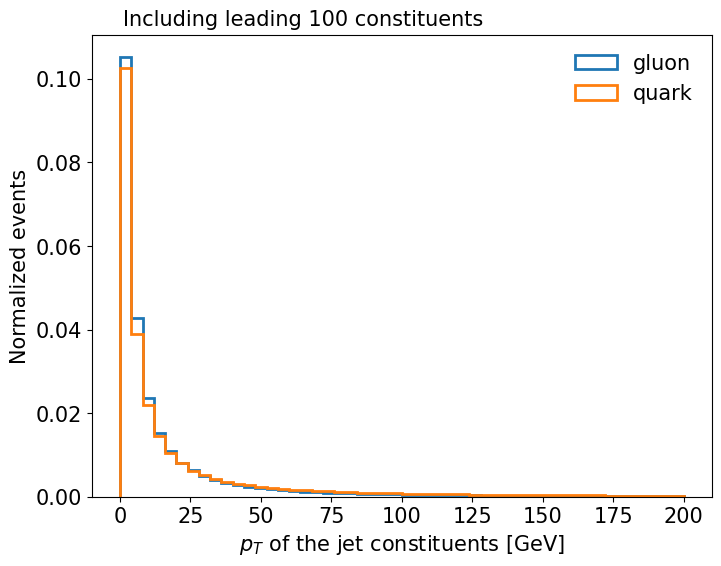

In [72]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['gluon', 'quark']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['pt']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = np.where(data_feature==0, -1, data_feature)

    ax.hist(data_feature1.flatten(), bins=50, range=(0,200), density=True, histtype='step', color=label_colors[label], label=label, linewidth=2)

ax.set_xlabel("$p_{T}$ of the jet constituents [GeV]")
ax.set_ylabel("Normalized events")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Including leading 100 constituents", transform=ax.transAxes)

Text(0.05, 1.02, 'Including leading 30 constituents')

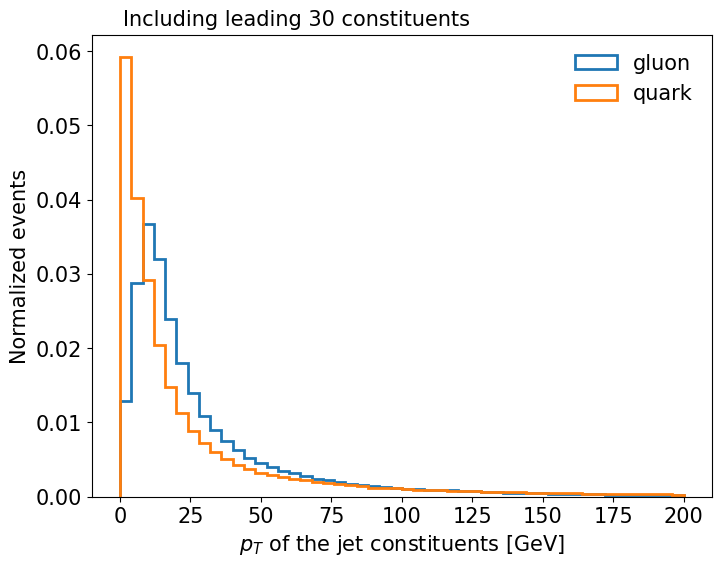

In [73]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['gluon', 'quark']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['pt']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = data_feature[:, :30]
    data_feature1 = np.where(data_feature1==0, -1, data_feature1)

    ax.hist(data_feature1.flatten(), bins=50, range=(0,200), density=True, histtype='step', color=label_colors[label], label=label, linewidth=2)

ax.set_xlabel("$p_{T}$ of the jet constituents [GeV]")
ax.set_ylabel("Normalized events")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Including leading 30 constituents", transform=ax.transAxes)

In [74]:
jetList[:,:,feat_idx][target == jet_type_idx][:, :30].flatten().shape

(295290,)

In [75]:
data_feature[:, ].flatten().shape

(984300,)

In [76]:
particle_features_names

{'px': 0,
 'py': 1,
 'pz': 2,
 'e': 3,
 'erel': 4,
 'pt': 5,
 'ptrel': 6,
 'eta': 7,
 'etarel': 8,
 'etarot': 9,
 'phi': 10,
 'phirel': 11,
 'phirot': 12,
 'deltaR': 13,
 'costheta': 14,
 'costhetarel': 15}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


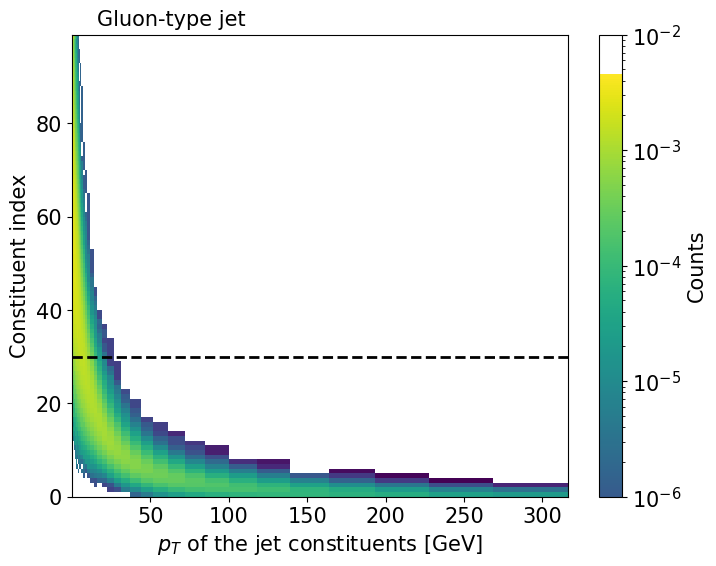

In [126]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['gluon']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['pt']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = np.where(data_feature==0, -1, data_feature)
    indices = np.array([list(np.arange(0,100))]*len(data_feature))

    counts, xedges, yedges, im = ax.hist2d(data_feature.flatten(), indices.flatten(), bins=(np.logspace(-1,2.5,50), np.arange(0,100,1)), density=True, norm=mpl.colors.LogNorm())
    
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Counts")
cbar.ax.set_yscale("log")
cbar.ax.set_ylim(1e-6,1e-2)

ax.axhline(30, linewidth=2, linestyle='--', color='black')
ax.set_xlabel("$p_{T}$ of the jet constituents [GeV]")
ax.set_ylabel("Constituent index")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Gluon-type jet", transform=ax.transAxes)
plt.savefig("particle_pt_gluon_jet.pdf", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


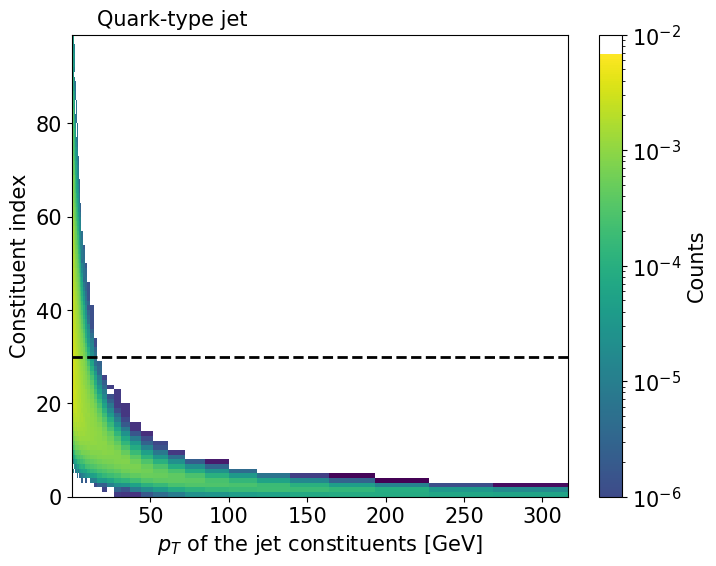

In [125]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['quark']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['pt']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = np.where(data_feature==0, -1, data_feature)
    indices = np.array([list(np.arange(0,100))]*len(data_feature))

    counts, xedges, yedges, im = ax.hist2d(data_feature.flatten(), indices.flatten(), bins=(np.logspace(-1,2.5,50), np.arange(0,100,1)), density=True, norm=mpl.colors.LogNorm())
    
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Counts")
cbar.ax.set_yscale("log")
cbar.ax.set_ylim(1e-6,1e-2)
ax.axhline(30, linewidth=2, linestyle='--', color='black')
ax.set_xlabel("$p_{T}$ of the jet constituents [GeV]")
ax.set_ylabel("Constituent index")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Quark-type jet", transform=ax.transAxes)
plt.savefig("particle_pt_quark_jet.pdf", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


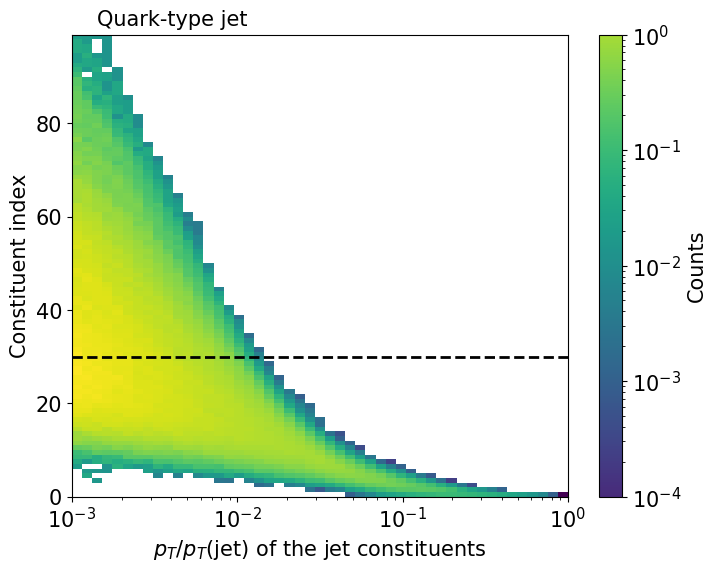

In [133]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['quark']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['ptrel']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = np.where(data_feature==0, -1, data_feature)
    indices = np.array([list(np.arange(0,100))]*len(data_feature))

    counts, xedges, yedges, im = ax.hist2d(data_feature.flatten(), indices.flatten(), bins=(np.logspace(-3,0,50), np.arange(0,100,1)), density=True, norm=mpl.colors.LogNorm())
    
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Counts")
cbar.ax.set_yscale("log")
cbar.ax.set_ylim(1e-4,1)
ax.set_xscale("log")
ax.axhline(30, linewidth=2, linestyle='--', color='black')
ax.set_xlabel("$p_{T}/p_{T}$(jet) of the jet constituents")
ax.set_ylabel("Constituent index")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Quark-type jet", transform=ax.transAxes)
plt.savefig("particle_ptrel_quark_jet.pdf", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


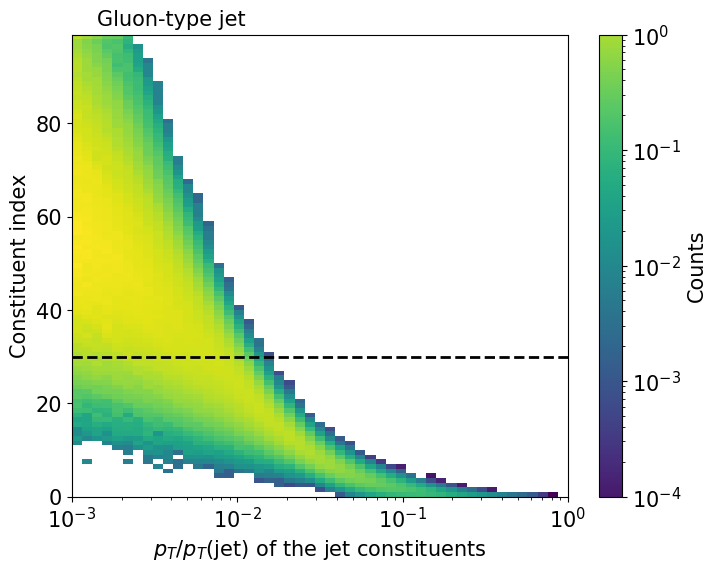

In [134]:
# ok we want to study the difference between quarks and gluons
# first plot pt of the constituents
fig, ax = plt.subplots(1,1, figsize=(8,6))
labels_to_plot = ['gluon']
for label in labels_to_plot :
    jet_type_idx = label_idx[label]
    feat_idx = particle_features_names['ptrel']
    data_feature = jetList[:,:,feat_idx]
    data_feature = data_feature[target == jet_type_idx]
    data_feature1 = np.where(data_feature==0, -1, data_feature)
    indices = np.array([list(np.arange(0,100))]*len(data_feature))

    counts, xedges, yedges, im = ax.hist2d(data_feature.flatten(), indices.flatten(), bins=(np.logspace(-3,0,50), np.arange(0,100,1)), density=True, norm=mpl.colors.LogNorm())
    
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Counts")
cbar.ax.set_yscale("log")
cbar.ax.set_ylim(1e-4,1)
ax.set_xscale("log")
ax.axhline(30, linewidth=2, linestyle='--', color='black')
ax.set_xlabel("$p_{T}/p_{T}$(jet) of the jet constituents")
ax.set_ylabel("Constituent index")
ax.legend(frameon=False, loc='upper right')
ax.text(0.05, 1.02, "Gluon-type jet", transform=ax.transAxes)
plt.savefig("particle_ptrel_gluon_jet.pdf", bbox_inches='tight')

In [91]:
np.array([list(np.arange(0,100))]*len(data_feature)).shape

(10044, 100)

In [92]:
np.array([list(np.arange(0,100))]*len(data_feature))

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [102]:
np.logspace(0,2,50)

array([  1.        ,   1.09854114,   1.20679264,   1.32571137,
         1.45634848,   1.59985872,   1.75751062,   1.93069773,
         2.12095089,   2.32995181,   2.55954792,   2.8117687 ,
         3.0888436 ,   3.39322177,   3.72759372,   4.09491506,
         4.49843267,   4.94171336,   5.42867544,   5.96362332,
         6.55128557,   7.19685673,   7.90604321,   8.68511374,
         9.54095476,  10.48113134,  11.51395399,  12.64855217,
        13.89495494,  15.26417967,  16.76832937,  18.42069969,
        20.23589648,  22.22996483,  24.42053095,  26.82695795,
        29.47051703,  32.37457543,  35.56480306,  39.06939937,
        42.9193426 ,  47.14866363,  51.79474679,  56.89866029,
        62.50551925,  68.6648845 ,  75.43120063,  82.86427729,
        91.0298178 , 100.        ])